In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.utils import np_utils
import time

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../Supervised learning/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
X = df.values[:, :5]
y = df.values[:, 5]

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0) 
dt.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(test_X)
print("Accuracy = {:.2f}".format(accuracy_score(test_y, y_pred)))
accuracy_score(test_y, y_pred)

Accuracy = 0.85


0.8491228070175438

Accuracy score from the Decision Tree model is 85.26. To guarantee this result is not impacted by overfitting, accuracy will be calculated again through cross validation:

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.82758621 0.89655172 0.82758621 0.86206897 0.78571429 0.89285714
 0.92857143 0.85714286 0.82142857 0.92857143]


86.28

Accuracy score from cross validation is 86.28

In [8]:
y_hat = dt.predict(np.array([[19.81,22.15,130.0,1260.0,0.09831],[12.86,18.0,83.19,506.3,0.09934], 
                                      [16.02,23.24,102.7,797.8,0.08206], [19.17,24.8,132.4,1123.0,0.0974]]))
y_hat

array([0., 1., 0., 0.])

In [9]:
def one_hot_encode_object_array(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [10]:
print(train_y)
print(train_y_ohe)

[1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]


In [11]:
model = Sequential()

In [12]:
model.add(Dense(40, input_shape=(5,)))
model.add(Activation('relu'))

In [13]:
model.add(Dense(20))
model.add(Activation('relu'))

In [14]:
model.add(Dense(2))
model.add(Activation('softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                240       
_________________________________________________________________
activation (Activation)      (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
______________________________________________________

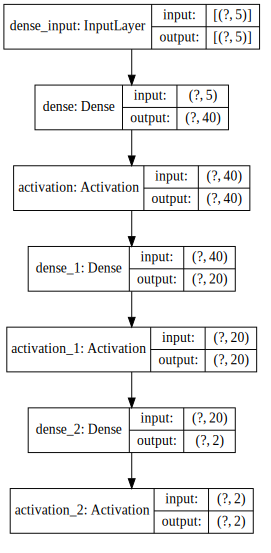

In [17]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi = 70).create(prog='dot', format='svg'))

In [18]:
import tensorflow as tf
time_0 = time.time()
model.fit(tf.convert_to_tensor(train_X, dtype=tf.float64), train_y_ohe, epochs=100, batch_size=1, verbose=1);
print(time.time() - time_0)

Train on 284 samples
Epoch 1/100
284/284 [==============================] - 1s 4ms/sample - loss: 18.1771 - accuracy: 0.6479
Epoch 2/100
284/284 [==============================] - 0s 983us/sample - loss: 0.7869 - accuracy: 0.7289
Epoch 3/100
284/284 [==============================] - 0s 973us/sample - loss: 0.7210 - accuracy: 0.7676
Epoch 4/100
284/284 [==============================] - 0s 987us/sample - loss: 0.7153 - accuracy: 0.7535
Epoch 5/100
284/284 [==============================] - 0s 980us/sample - loss: 0.6061 - accuracy: 0.7993
Epoch 6/100
284/284 [==============================] - 0s 987us/sample - loss: 0.9453 - accuracy: 0.7500
Epoch 7/100
284/284 [==============================] - 0s 990us/sample - loss: 0.6699 - accuracy: 0.8275
Epoch 8/100
284/284 [==============================] - 0s 990us/sample - loss: 0.8033 - accuracy: 0.7852
Epoch 9/100
284/284 [==============================] - 0s 1ms/sample - loss: 0.5181 - accuracy: 0.8239
Epoch 10/100
284/284 [===============

284/284 [==============================] - 0s 1ms/sample - loss: 0.3469 - accuracy: 0.8451
Epoch 80/100
284/284 [==============================] - 0s 1ms/sample - loss: 0.3271 - accuracy: 0.8662
Epoch 81/100
284/284 [==============================] - 0s 980us/sample - loss: 0.3458 - accuracy: 0.8662
Epoch 82/100
284/284 [==============================] - 0s 969us/sample - loss: 0.3401 - accuracy: 0.8768
Epoch 83/100
284/284 [==============================] - 0s 976us/sample - loss: 0.3548 - accuracy: 0.8521
Epoch 84/100
284/284 [==============================] - 0s 990us/sample - loss: 0.3458 - accuracy: 0.8556
Epoch 85/100
284/284 [==============================] - 0s 973us/sample - loss: 0.3436 - accuracy: 0.8451
Epoch 86/100
284/284 [==============================] - 0s 973us/sample - loss: 0.3394 - accuracy: 0.8697
Epoch 87/100
284/284 [==============================] - 0s 1ms/sample - loss: 0.3340 - accuracy: 0.8592
Epoch 88/100
284/284 [==============================] - 0s 987us/

In [19]:
loss, accuracy = model.evaluate(tf.convert_to_tensor(test_X, dtype=tf.float64), test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.88


In [20]:
y_p = model.predict([[19.81,22.15,130.0,1260.0,0.09831],[12.86,18.0,83.19,506.3,0.09934], 
                                      [16.02,23.24,102.7,797.8,0.08206], [19.17,24.8,132.4,1123.0,0.0974]])
#print(test_X)
print(np.round(y_p,3))

[[0.999 0.001]
 [0.133 0.867]
 [0.857 0.143]
 [0.99  0.01 ]]


In [21]:
model_json = model.to_json()
with open("breast_cancer_nn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("breast_cancer_nn.h5")

In [22]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('breast_cancer_nn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("breast_cancer_nn.h5")

In [23]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
loss, accuracy = loaded_model.evaluate(test_X, test_y_ohe, verbose=0)

print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.88


In [24]:
nn_y = loaded_model.predict(np.array([[19.81,22.15,130.0,1260.0,0.09831],[12.86,18.0,83.19,506.3,0.09934], 
                                      [16.02,23.24,102.7,797.8,0.08206], [19.17,24.8,132.4,1123.0,0.0974]]))

print(np.round(nn_y,3))

[[0.999 0.001]
 [0.133 0.867]
 [0.857 0.143]
 [0.99  0.01 ]]
